In [33]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 
import jax.numpy as jnp
from jax.scipy import stats

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Samples

In [3]:
samples_fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_44/interim_samples_441_plus.npz"

In [4]:
ds = load_dataset(samples_fpath)

In [22]:
ds['hyper']

{'g1': array(0.02),
 'sigma_e_int': array(0.3),
 'sigma_loghlr': array(0.05),
 'g2': array(0.),
 'mean_loghlr': array(-0.4),
 'sigma_logflux': array(0.4),
 'shape_noise': array(0.2),
 'mean_logflux': array(2.5),
 'min_logflux': array(2.45)}

In [5]:
ds.keys()

dict_keys(['samples', 'truth', 'hyper'])

In [9]:
ds['truth'].keys()

dict_keys(['lf', 'e2', 'e1', 'x', 'lhlr', 'y'])

In [21]:
ds['samples']['lf'].shape, ds['samples']['e1'].shape, ds['samples']['dx'].shape

((60000, 300), (60000, 300), (60000, 300))

## Check interim sample chains

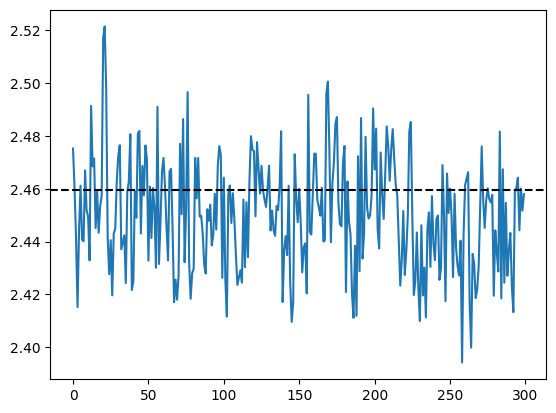

In [13]:
plt.plot(ds['samples']['lf'][90, :])
plt.axhline(ds['truth']['lf'][90], c='k', ls='--')

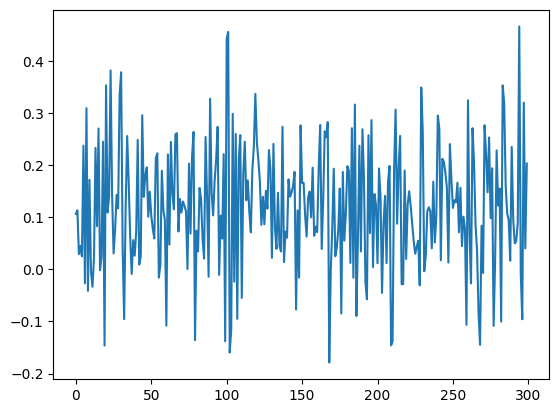

In [15]:
plt.plot(ds['samples']['dx'][1, :])

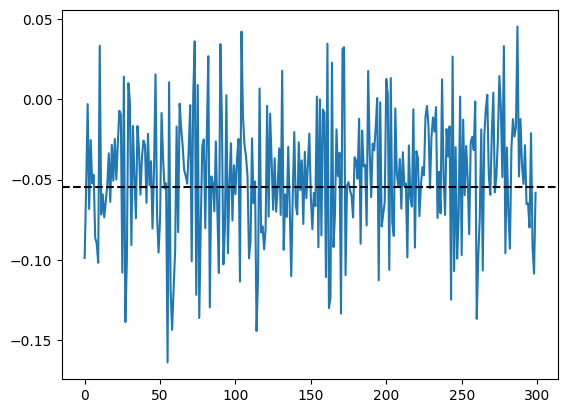

In [17]:
plt.plot(ds['samples']['e1'][11, :])
plt.axhline(ds['truth']['e1'][11], c='k', ls='--')

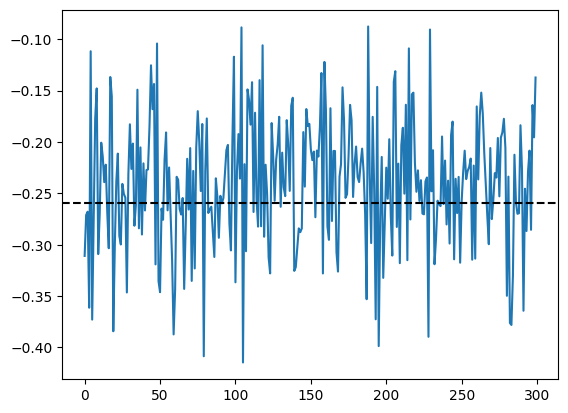

In [18]:
plt.plot(ds['samples']['e2'][5, :])
plt.axhline(ds['truth']['e2'][5], c='k', ls='--')

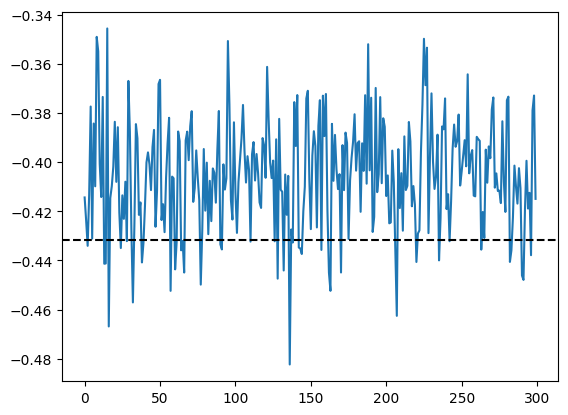

In [20]:
plt.plot(ds['samples']['lhlr'][11, :])
plt.axhline(ds['truth']['lhlr'][11], c='k', ls='--')

## Log fluxes and truncated prior

In [24]:
tlf.shape

(60000,)

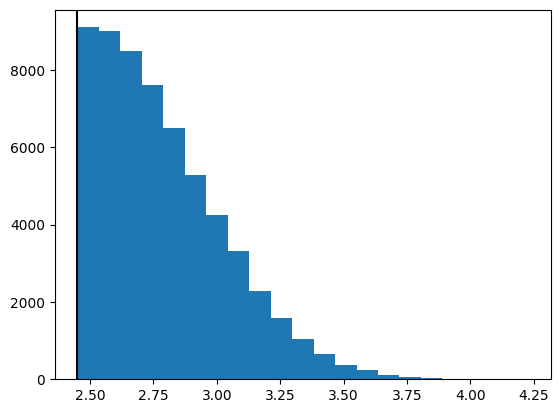

In [27]:
#true flux histogram 
tlf = ds['truth']['lf']
plt.hist(tlf, bins=21)
plt.axvline(2.45,c='k')

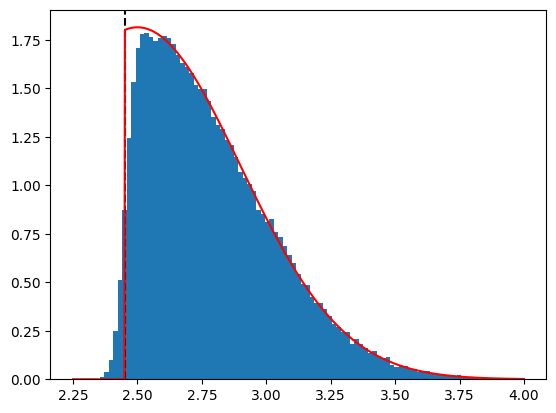

In [56]:

lf = ds['samples']['lf'].ravel()
plt.axvline(2.45,c='k', ls='--')
plt.hist(lf, bins=101, density=True, range=(2.25, 4.0))


# density 
a = (2.45 - 2.5) / 0.4
b = jnp.inf
x = np.linspace(2.25, 4.0, 1000) 
y = stats.truncnorm.pdf(x, a=a, b=b, loc=2.5, scale=0.4)
plt.plot(x, y, 'r-')

In [57]:
ds['samples']['lf'].shape

(60000, 300)

In [58]:
sum(ds['samples']['lf'].min(1) < 2.45) / 60e3

np.float64(0.10625)

In [40]:
sum(lf < 2.45), lf.min()

(np.int64(417828), np.float64(2.2776681499303395))

In [35]:
a = (2.45 - 2.5) / 0.4
b = jnp.inf
stats.truncnorm.logpdf(2.277, a=a, b=b, loc=2.5, scale=0.4)

Array(-inf, dtype=float64)

# Shear

In [8]:
pfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_44/g_samples_442_plus.npy"
mfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_44/g_samples_442_minus.npy"

In [9]:
gp = np.load(fpath)
gm = np.load(fpath)

In [11]:
gp.shape, gm.shape

((3000, 2), (3000, 2))

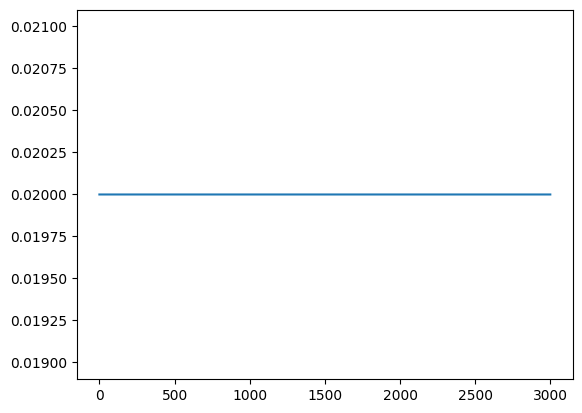

In [12]:
plt.plot(gp[:, 0])

# Bootstraps 

In [1]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/g_samples_boots_443.npz"

In [3]:
ds = load_dataset(fpath)

In [4]:
ds.keys()

dict_keys(['minus', 'plus'])

In [5]:
ds['plus'].keys()

dict_keys(['g2', 'g1', 'sigma_e'])

In [6]:
ds['plus']['g1'].shape, ds['plus']['sigma_e'].shape

((202, 1000), (202, 1000))

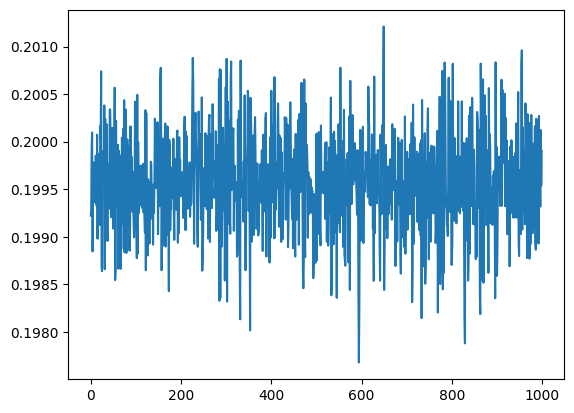

In [23]:
plt.plot(ds['plus']['sigma_e'][5])

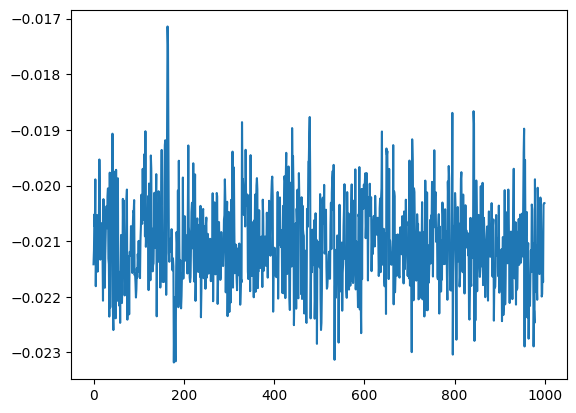

In [8]:
plt.plot(ds['minus']['g1'][0])

In [10]:
gp1 = ds['plus']['g1']
gm1 = ds['minus']['g1']

In [12]:
gp1.shape, gm1.shape

((202, 1000), (202, 1000))

In [14]:
mboot = (
    gp1.mean(axis=1) - gm1.mean(axis=1)
) / 2 / 0.02 - 1

(array([ 8.,  8., 13., 34., 37., 37., 36., 19.,  8.,  2.]),
 array([0.01684165, 0.01721554, 0.01758943, 0.01796332, 0.01833721,
        0.0187111 , 0.01908499, 0.01945887, 0.01983276, 0.02020665,
        0.02058054]),
 <BarContainer object of 10 artists>)

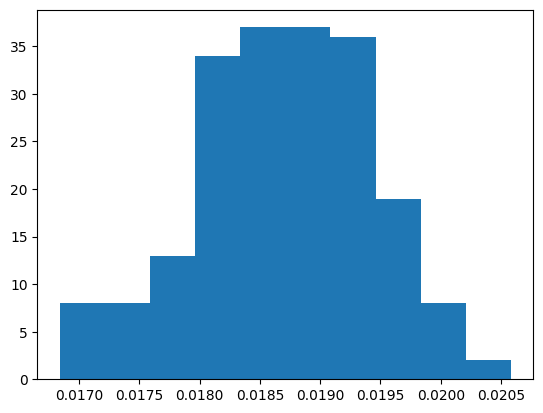

In [16]:
plt.hist(gp1.mean(axis=1))

(array([ 8.,  4., 11., 29., 52., 55., 23., 10.,  6.,  4.]),
 array([-0.00303344, -0.00258045, -0.00212746, -0.00167447, -0.00122148,
        -0.00076849, -0.0003155 ,  0.00013749,  0.00059048,  0.00104347,
         0.00149646]),
 [<matplotlib.patches.Polygon at 0x7f91fd8e57f0>])

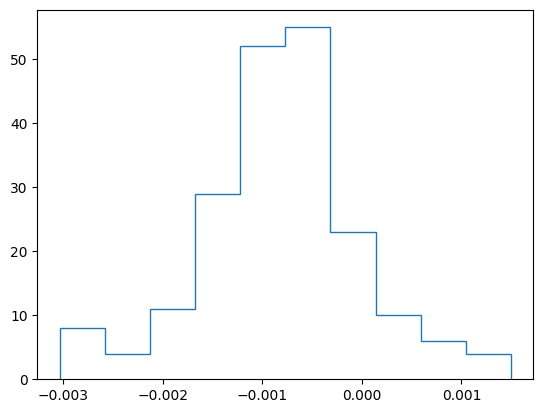

In [17]:
plt.hist(mboot, histtype='step')

In [59]:
# mboot.mean(), mboot.std()

# Alternative method of estimating errors

In [24]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [25]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_44/"

In [26]:
ds = load_dataset(fpath)

In [28]:
g1p = ds['plus']['g'][:, :, 0]
g1.shape

(500, 1000)

In [29]:
g1m = ds['minus']['g'][:, :, 0]
g1m.shape

(500, 1000)

In [36]:
m = (g1p.mean(1) - g1m.mean(1)) / 2/ 0.02  - 1
m.shape

(500,)

(array([  3.,  16.,  50., 109., 126., 112.,  61.,  20.,   2.,   1.]),
 array([-0.05437142, -0.04315671, -0.031942  , -0.02072729, -0.00951258,
         0.00170213,  0.01291684,  0.02413155,  0.03534626,  0.04656097,
         0.05777569]),
 <BarContainer object of 10 artists>)

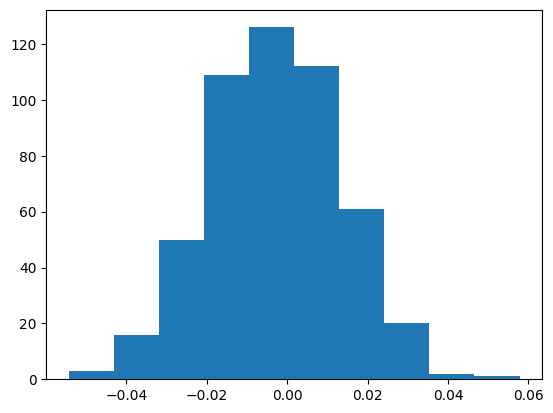

In [37]:
plt.hist(m)

In [38]:
m.mean()

np.float64(-0.002757603946102887)

In [39]:
m.std() / np.sqrt(len(m))

np.float64(0.0007354796286959472)